In [1]:
import json 

In [2]:
DIR_PATH = "/Users/given/projects/sound-symbolism/results/perturb"

# field
WORD_GROUP = "constructed"
IS_CORRECT = "is_correct"
PROBS = "probs"

# input type
ORIGINAL = "original"
AUDIO = "audio"
IPA = "ipa"
ORIGINAL_AND_AUDIO = "original_and_audio"
IPA_AND_AUDIO = "ipa_and_audio"

In [3]:
def load_logit_lens_file(input_type):
    # file_path = f"{DIR_PATH}/{input_type}_{WORD_GROUP}.json"
    file_path = "/Users/given/projects/sound-symbolism/results/logit_lens/prompts.json"
    with open(file_path, 'r') as file:
        logit_lens_results = json.load(file)
    
    return logit_lens_results

In [4]:
original_file = load_logit_lens_file(ORIGINAL)
ipa_file = load_logit_lens_file(IPA)
audio_file = load_logit_lens_file(AUDIO)
original_and_audio_file = load_logit_lens_file(ORIGINAL_AND_AUDIO)
ipa_and_audio_file = load_logit_lens_file(IPA_AND_AUDIO)


print(len(original_file))
print(len(ipa_file))
print(len(audio_file))
print(len(original_and_audio_file))
print(len(ipa_and_audio_file))

32
32
32
32
32


In [5]:
# intersection keys for all 
intersection_keys = list(
    set(original_file.keys()) & set(ipa_file.keys()) & set(audio_file.keys()) & set(original_and_audio_file.keys()) 
    & set(ipa_and_audio_file.keys())
)
len(intersection_keys)

32

In [6]:
def format_results(logit_lens_results, item_id_list):
    out = {}
    
    for key in item_id_list:
        print(f"item_id: {key}")
        probs = []
        prompt = ""
        logits = []
        response = ""
        x = logit_lens_results[key]
        for layer_id, v in x.items():
            if isinstance(v, str): 
                if "prompt" in layer_id:
                    prompt = v
                elif "response" in layer_id:
                    response = v
            else:
                probs.append(v["choice"]["prob"])
                logits.append(v["choice"]["logit"])
        
        out[key] = {
            "prompt": prompt,
            "response": response,
            "probs": probs,
            "logits": logits,
        }
    
    return out
    

In [7]:
original_results = format_results(original_file, intersection_keys)
print(original_results)
# audio_results = format_results(audio_file, intersection_keys)
# original_and_audio_results = format_results(original_and_audio_file, intersection_keys)
# ipa_results = format_results(ipa_file, intersection_keys)
# ipa_and_audio_results = format_results(ipa_and_audio_file, intersection_keys)
# print(len(original_results))


item_id: 18
item_id: 19
item_id: 11
item_id: 17
item_id: 10
item_id: 4
item_id: 9
item_id: 31
item_id: 21
item_id: 15
item_id: 22
item_id: 24
item_id: 0
item_id: 30
item_id: 2
item_id: 12
item_id: 20
item_id: 27
item_id: 29
item_id: 5
item_id: 8
item_id: 25
item_id: 28
item_id: 16
item_id: 1
item_id: 14
item_id: 6
item_id: 7
item_id: 13
item_id: 26
item_id: 3
item_id: 23
{'18': {'prompt': 'Write a short poem about the ocean.', 'response': "The ocean, vast and deep and wide.A world of mystery, full of pride.Its waves, like whispers, softly play.A dance of power, a gentle sway.The salty air, a cool embrace.The ocean's embrace, it makes us chase.Our thoughts to it, we often confide.A friend in blue, a constant guide.So, what do you think? Do you have any ideas for a different kind of poem?", 'probs': [[9.685754776000977e-07], [9.052455425262451e-07], [9.685754776000977e-07], [5.662441253662109e-07], [1.2889504432678223e-06], [7.927417755126953e-06], [3.147125244140625e-05], [2.32458114624

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def plot_probs_by_key(total_results, key, input_type, log_scale=False):
    result = total_results[key]
    probs = result["probs"]
    prompt = result["prompt"]
    response = result["response"]
    
    data = np.array(probs)
    y1 = data[:, 0]
#     y2 = data[:, 1]
    x = np.arange(len(y1))
    
    # Pick colors for each curve
    color1 = 'red'
    color2 = 'blue'
    
    plt.figure(figsize=(5, 2))
    
    # Plot curves
    plt.plot(x, y1, label=f'close', color=color1)
#     plt.plot(x, y2, label=f'far', color=color2)
    # plt.ylim(0, 1.00)
    
    # Max point for y1
    max_idx_y1 = np.argmax(y1)
    max_val_y1 = y1[max_idx_y1]
    plt.scatter(max_idx_y1, max_val_y1, color=color1, s=100, zorder=5)
    # plt.text(max_idx_y1, max_val_y1, f"{max_val_y1:.3g}",
            #  color=color1, fontsize=10, ha='left', va='bottom')
    
    # Max point for y2
#     max_idx_y2 = np.argmax(y2)
#     max_val_y2 = y2[max_idx_y2]
#     plt.scatter(max_idx_y2, max_val_y2, color=color2, s=100, zorder=5)
    # plt.text(max_idx_y2, max_val_y2, f"{max_val_y2:.3g}",
            #  color=color2, fontsize=10, ha='left', va='bottom')
    
    # Last point of y1
    last_x1 = x[-1]
    last_y1 = y1[-1]
    plt.scatter(last_x1, last_y1, color=color1, marker='^', s=100, zorder=5)
    plt.text(last_x1, last_y1, f"{last_y1:.3g}",
             color=color1, fontsize=10, ha='left', va='bottom')
    
    # Last point of y2
#     last_x2 = x[-1]
#     last_y2 = y2[-1]
#     plt.scatter(last_x2, last_y2, color=color2, marker='^', s=100, zorder=5)
#     plt.text(last_x2, last_y2, f"{last_y2:.3g}",
        #      color=color2, fontsize=10, ha='left', va='bottom')
    
    plt.xlabel('Index')
    plt.ylabel('Values')
#     title = f"prompt: {prompt}\nresponse: {response}"
#     plt.title(title)
    plt.legend()
    plt.grid(True)
    
    if log_scale:
        plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

In [9]:
i=0

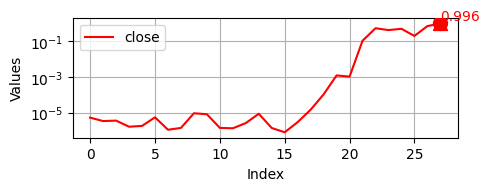

31
prompt:  Pretend you are a barista. Explain different types of coffee drinks to a customer.
response:  Well, there's the latte. It's a really popular one. It's made up of espresso and steamed milk. The steamed milk is usually topped with a layer of frothy milk. It has a nice balance of coffee and milk flavors.Then there's the cappuccino. It's also made with espresso and steamed milk, but it has a different ratio. It has a lot more foam on top, which gives it a really light and airy texture.And the Americano. It's just espresso and hot water. It's a bit more diluted compared to the espresso alone.So, which one are you interested in? There are be more to talk about if you want.


In [42]:
key = str(i)

log_scale = True
plot_probs_by_key(original_results, key, ORIGINAL, log_scale)
print(i)
print("prompt: ", original_results[key]["prompt"])
print("response: ", original_results[key]["response"])
i += 1 

In [11]:
len(df)

NameError: name 'df' is not defined

In [ ]:
# df.to_csv('logit_lens_data.csv', index=False)

In [ ]:
print(df['dim'].value_counts())



dim
sharp-round           5
ordinary-unique       5
masculine-feminine    4
delicate-rugged       4
abrupt-continuous     3
solid-nonsolid        3
heavy-light           2
exciting-calming      2
strong-weak           1
harsh-mellow          1
hard-soft             1
inhibited-free        1
fast-slow             1
Name: count, dtype: int64


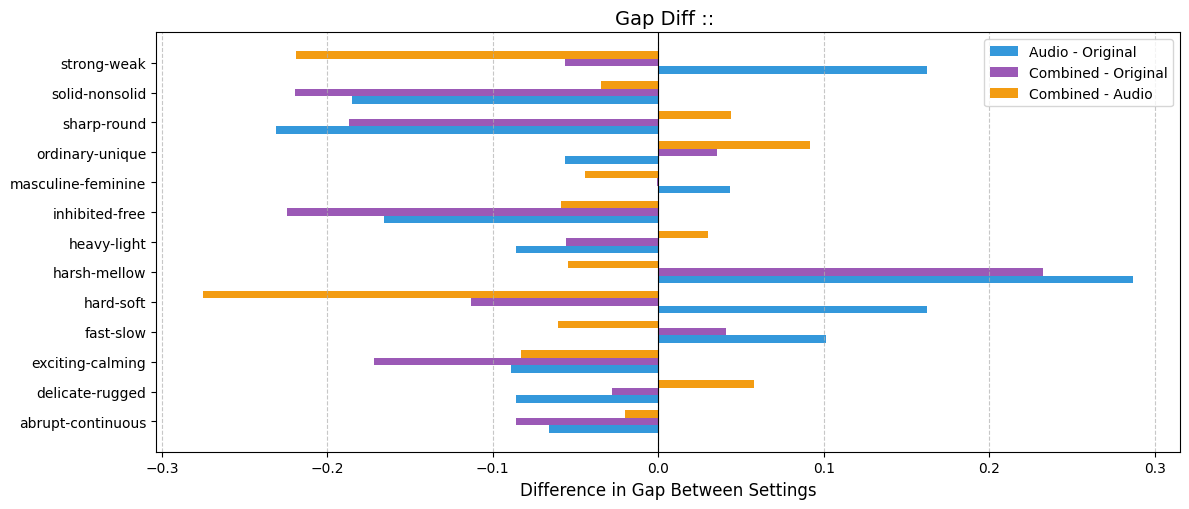

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict


def analyze_semantic_dimension_gaps(df):
    def _calculate_choice_gap(logits):
        """Calculate the absolute gap between two choice probabilities in the final layer."""
        final_layer = max(int(k) for k in logits if k.isdigit())
        probs = logits[str(final_layer)]["choice"]["prob"]
        return abs(probs[0] - probs[1])

    def _initialize_dim_result():
        """Return an initialized result dictionary for a semantic dimension."""
        return {
            'original': [],
            'audio': [],
            'original_and_audio': [],
            'correct_original': 0,
            'correct_audio': 0,
            'correct_original_and_audio': 0,
            'count': 0
        }

    def _update_dim_result(result, row):
        """Update a semantic dimension result entry based on a row of data."""
        result['original'].append(_calculate_choice_gap(row['logits']['original']))
        result['audio'].append(_calculate_choice_gap(row['logits']['audio']))
        result['original_and_audio'].append(_calculate_choice_gap(row['logits']['original_and_audio']))
        result['correct_original'] += int(row['original'])
        result['correct_audio'] += int(row['audio'])
        result['correct_original_and_audio'] += int(row['original_and_audio'])
        result['count'] += 1
        
    def _finalize_dim_statistics(results):
        for dim, val in results.items():
            val['avg_original'] = np.mean(val['original'])
            val['avg_audio'] = np.mean(val['audio'])
            val['avg_original_and_audio'] = np.mean(val['original_and_audio'])
            val['acc_original'] = val['correct_original'] / val['count']
            val['acc_audio'] = val['correct_audio'] / val['count']
            val['acc_original_and_audio'] = val['correct_original_and_audio'] / val['count']

    
    results = defaultdict(_initialize_dim_result)
    for dim, group in df.groupby('dim'):
        for _, row in group.iterrows():
            _update_dim_result(results[dim], row)
    _finalize_dim_statistics(results)
    
    return results


def plot_semantic_dimension_gaps(results, top_n=15):
    df = pd.DataFrame([
        {
            'dim': dim,
            'original': val['avg_original'],
            'audio': val['avg_audio'],
            'original_and_audio': val['avg_original_and_audio'],
            'acc_original': val['acc_original'],
            'acc_audio': val['acc_audio'],
            'acc_original_and_audio': val['acc_original_and_audio'],
            'count': val['count'],
            'avg_gap': np.mean([val['avg_original'], val['avg_audio'], val['avg_original_and_audio']])
        }
        for dim, val in results.items()
    ])
    # df = df.sort_values('avg_gap', ascending=False).head(top_n)

    fig, ax = plt.subplots(figsize=(12, max(8, len(df) * 0.4)))
    width = 0.25
    x = np.arange(len(df))
    colors = ['#3498db', '#e74c3c', '#2ecc71']

    bars = [
        ax.barh(x - width, df['original'], width, label='Original', color=colors[0], alpha=0.8),
        ax.barh(x, df['audio'], width, label='Audio', color=colors[1], alpha=0.8),
        ax.barh(x + width, df['original_and_audio'], width, label='Original+Audio', color=colors[2], alpha=0.8)
    ]

    for i in range(len(df)):
        for j, bar in enumerate([bars[0], bars[1], 
                                 bars[2]]):
            acc_key = ['acc_original', 'acc_audio', 'acc_original_and_audio'][j]
            acc = df.iloc[i][acc_key]
            width = bar[i].get_width()
            x_text = width + 0.01 if width > 0.05 else width + 0.02  # 더 크게 띄움
            ha = 'left' if width > 0.05 else 'right'  # 짧은 경우 오른쪽 정렬
            ax.text(x_text, bar[i].get_y() + bar[i].get_height()/2, f"{acc:.2f}",
                    va='center', ha=ha, fontsize=8, color='black')  # 컬러 고정

    ax.set_xlabel('Average Gap Between Semantic Dimension Choices', fontsize=12)
    ax.set_yticks(x)
    ax.set_yticklabels(df['dim'], fontsize=10)
    ax.set_title('Semantic Dimension Gaps Across Settings', fontsize=14)
    ax.legend()
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


def plot_semantic_dimension_gap_differences(results, top_n=15, lang=""):
    df = pd.DataFrame([
        {
            'dim': dim,
            'audio_vs_original': val['avg_audio'] - val['avg_original'],
            'combined_vs_original': val['avg_original_and_audio'] - val['avg_original'],
            'combined_vs_audio': val['avg_original_and_audio'] - val['avg_audio'],
            'avg_gap': np.mean([val['avg_original'], val['avg_audio'], val['avg_original_and_audio']]),
            'count': val['count']
        }
        for dim, val in results.items()
    ])
    df['abs_audio_vs_original'] = df['audio_vs_original'].abs()
    # df = df.sort_values('abs_audio_vs_original', ascending=False).head(top_n)

    fig, ax = plt.subplots(figsize=(12, min(8, len(df) * 0.4)))
    width = 0.25
    x = np.arange(len(df))
    colors = ['#3498db', '#9b59b6', '#f39c12']

    ax.barh(x - width, df['audio_vs_original'], width, label='Audio - Original', color=colors[0])
    ax.barh(x, df['combined_vs_original'], width, label='Combined - Original', color=colors[1])
    ax.barh(x + width, df['combined_vs_audio'], width, label='Combined - Audio', color=colors[2])

    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    ax.set_xlabel('Difference in Gap Between Settings', fontsize=12)
    ax.set_yticks(x)
    ax.set_yticklabels(df['dim'], fontsize=10)
    ax.set_title(f'Gap Diff :: {lang.upper()}', fontsize=14)
    ax.legend()
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Example usage:
top_n = 25
result = analyze_semantic_dimension_gaps(df)
# plot_semantic_dimension_gaps(result, top_n)
plot_semantic_dimension_gap_differences(result, top_n)

In [ ]:
top_n = 25
result = analyze_semantic_dimension_gaps(df[df['lang'] == 'ko'])
# plot_semantic_dimension_gaps(result, top_n)
plot_semantic_dimension_gap_differences(result, top_n, lang='ko')

KeyError: 'audio_vs_original'

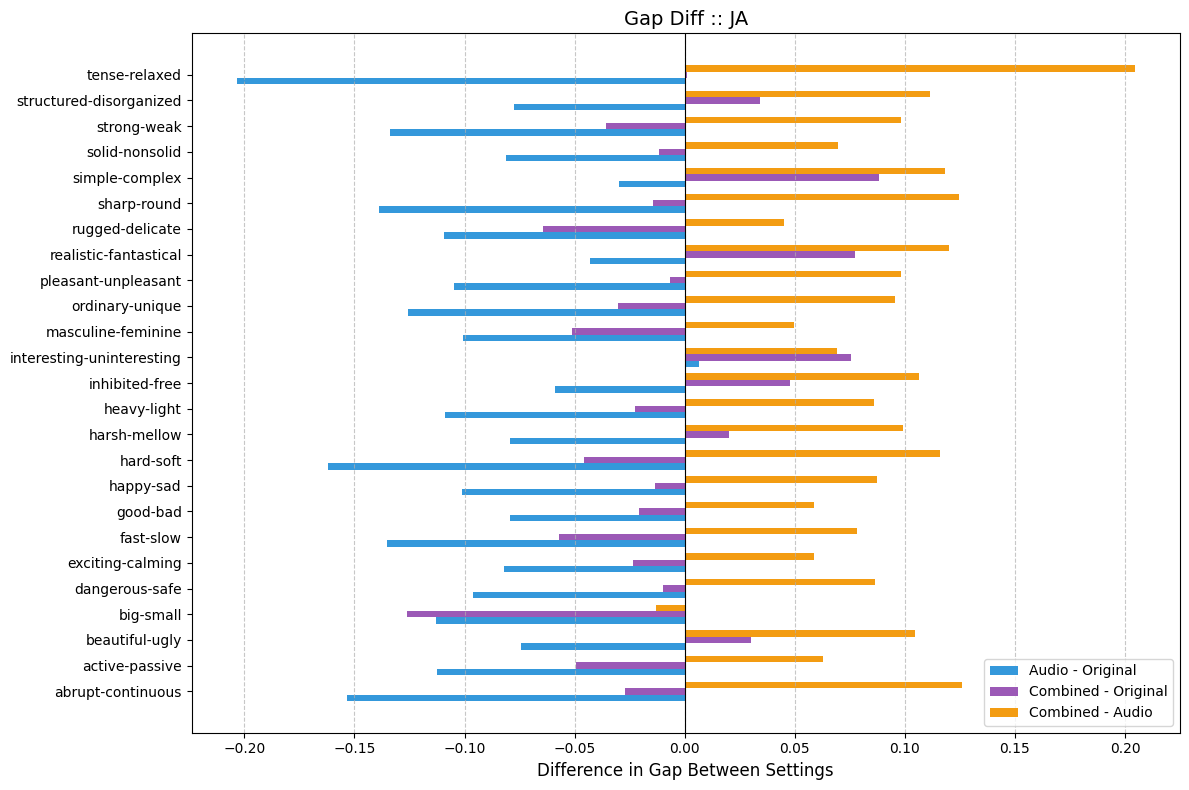

In [ ]:
top_n = 25
result = analyze_semantic_dimension_gaps(df[df['lang'] == 'ja'])
# plot_semantic_dimension_gaps(result, top_n)
plot_semantic_dimension_gap_differences(result, top_n, lang='ja')

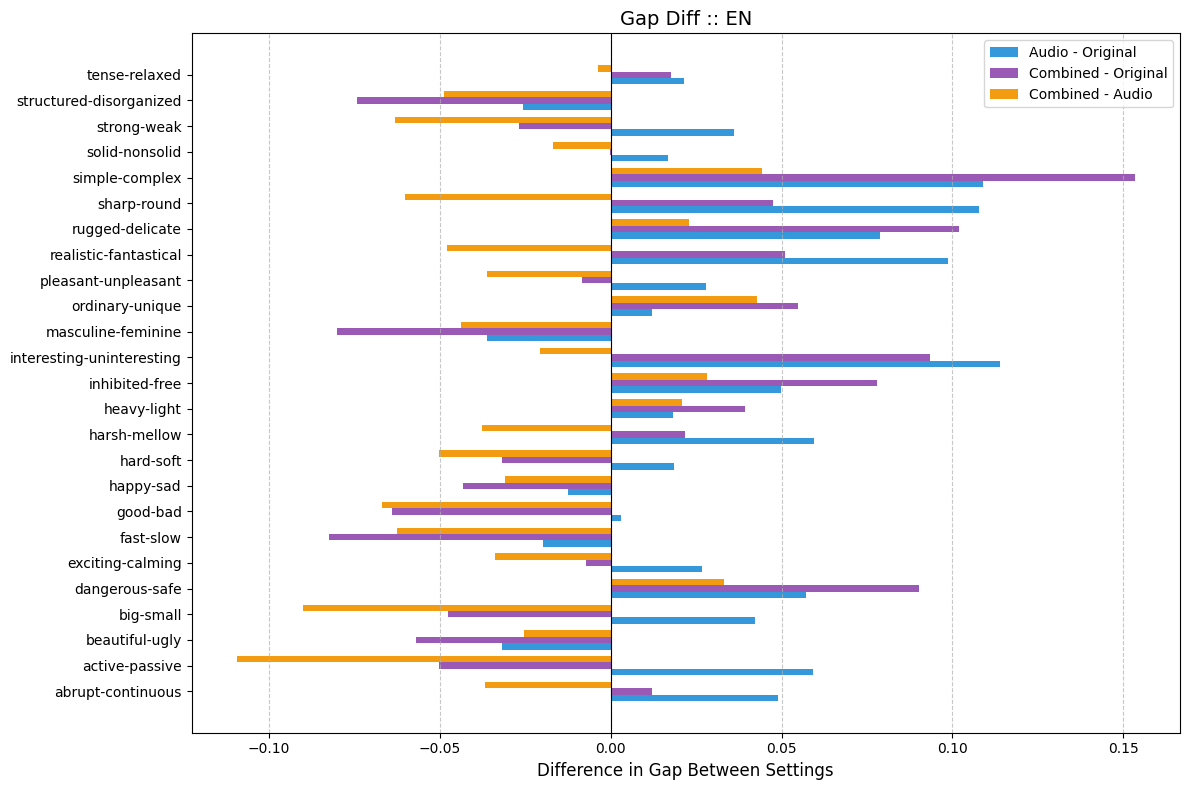

In [ ]:
top_n = 25
result = analyze_semantic_dimension_gaps(df[df['lang'] == 'en'])
# plot_semantic_dimension_gaps(result, top_n)
plot_semantic_dimension_gap_differences(result, top_n, lang="en")

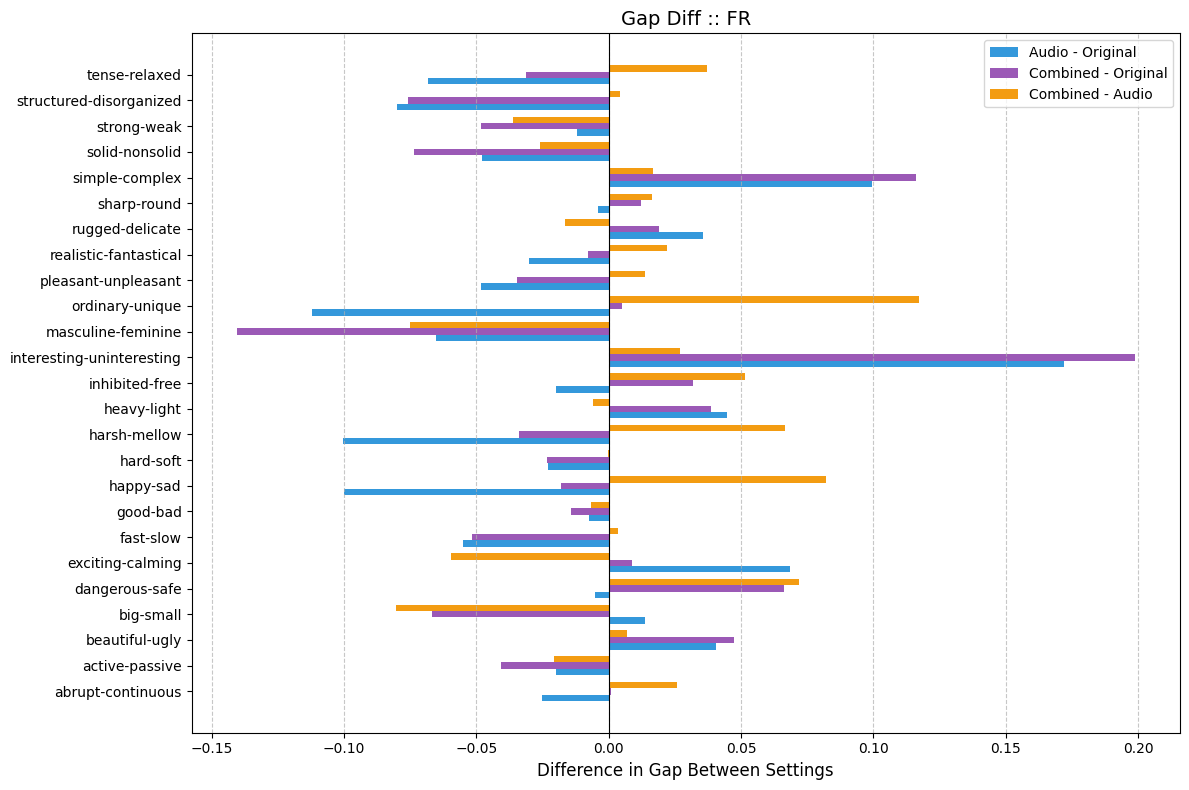

In [ ]:
top_n = 25
result = analyze_semantic_dimension_gaps(df[df['lang'] == 'fr'])
# plot_semantic_dimension_gaps(result, top_n)
plot_semantic_dimension_gap_differences(result, top_n, lang='fr')